# Dive into Deep Learning (DDL): Chapter 7:7.1-7.4

Exercises: 7.3.4, #1

In [6]:
import torch
from torch import nn

# We define a helper function to calculate convolutions. It initializes the
# convolutional layer weights and performs corresponding dimensionality
# elevations and reductions on the input and output
def comp_conv2d(conv2d, X):
    # (1, 1) indicates that batch size and the number of channels are both 1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # Strip the first two dimensions: examples and channels
    return Y.reshape(Y.shape[2:])

In [ ]:
#7.1 Notes:
#CNNs systematize this idea of spatial invariance, exploiting it to learn useful representations with fewer parameters (not concerned with the precise location of the object in the image)
#translation invariance/equivariance: In the earliest layers, our network should respond similarly to the same patch, regardless of where it appears in the image.
# locality principle: earliest layers of the network should focus on local regions, without regard for the contents of the image in distant regions. 
# Deeper layers capture longer-range features of the image
#7.2 Notes: 
#convolutional layers do cross-correlations, output smaller than input size based on d-k+1
#A convolutional layer cross-correlates the input and kernel (a parameter) and adds a scalar bias (another parameter) to produce an output.
#Convolutions have many purposes: detecting edges and lines, blurring images, or sharpening them. 
# They are matrix–matrix operation between channels (computation is local, which offers hardware optimizations). Suitable filters are learned from the data.
#7.3 Notes: 
# Setting padding to be (k-1)/2 on each side results in input and output the same dimensions
# Stride:  number of rows and columns traversed per slide 


In [6]:
#7.3.4.1: Given the final code example in this section with kernel size (3,5), padding (0, 1), and stride (3, 4) on an image of size (8,8),
# The output shape is ( [8-3+0]/3 +1 , [8-5+1]/4 +1) = (1+1, 1+1) = (2,2), which is consistent with the experimental results.

X = torch.rand(size=(8, 8))
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

# Dive into Deep Learning (DDL): Chapter 7:7.5-7.6

Exercises: 7.6.4, #1-5


In [7]:
# 7.5 Notes:
# pooling layers: mitigates the sensitivity of convolutional layers to location, and also spatially downsamples representations
# pooling aggregate results over a window of values, deterministic, max-pooling or average pooling

In [3]:
from d2l import torch as d2l

In [ ]:
#7.6 Notes:
# LeNet has a convolutional encoder consisting of two convolutional layers, and a dense block consisting of three fully connected layers
# basic units in each convolutional block are a convolutional layer with 5x5 kernel, a sigmoid activation function, and a subsequent average pooling operation (ReLU or max-pooling would have been better)
# to pass output from the convolutional block to the dense block, we must flatten each example in the minibatch
# LeNet’s dense block has three fully connected layers, with 120, 84, and 10 outputs (number of possible output classes)

In [4]:
def init_cnn(module):  #@save
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):  #@save
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [10]:
@d2l.add_to_class(d2l.Classifier)  #@save
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


/Users/kushagraghosh/opt/anaconda3/envs/bassconnections/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


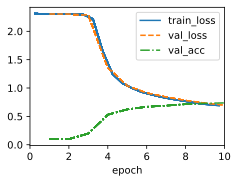

In [11]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

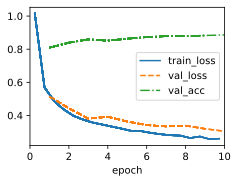

In [13]:
#Improved 7.6.4.1: Replaced average pooling with max-pooling and the softmax layer with ReLU.
class ImprovedLeNet(d2l.Classifier):  #@save
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))
        
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = ImprovedLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

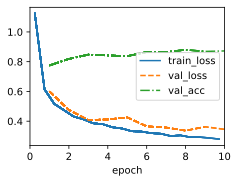

In [7]:
#7.6.4.2: New network: 
class MoreImprovedLeNet(d2l.Classifier):  #@save
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(12, kernel_size=3, padding=2), nn.ReLU(), #adjust the convolution window size to 3, output channels to 12
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(32, kernel_size=3), nn.ReLU(), #adjust the convolution window size to 3, output channels to 32
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(64, kernel_size=2), nn.ReLU(), #added convolution layer
            nn.MaxPool2d(kernel_size=2, stride=2), 
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(), #already adjusted the ReLU activation function
            nn.LazyLinear(num_classes))
        
#7.6.4.3: Trying out the improved network on the original MNIST dataset.
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = MoreImprovedLeNet(lr=0.2) #adjusted learning rate
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

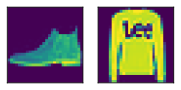

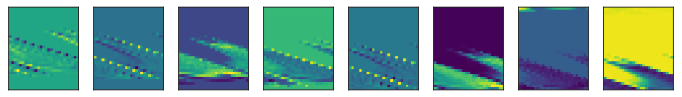

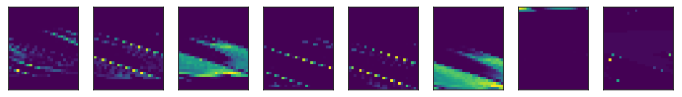

In [14]:
#7.6.4.4: Display the activations of the first and second layer of LeNet for different inputs (e.g., sweaters and coats):

inputs = data.val.data[:2,:].type(torch.float32).unsqueeze(dim=1)
d2l.show_images(inputs.squeeze(),1,2)
d2l.show_images(model.net[0](inputs).squeeze().detach().numpy().reshape(-1,32,27), 1, 8)
d2l.show_images(model.net[:2](inputs).squeeze().detach().numpy().reshape(-1,32,27),1,8)